<a href="https://colab.research.google.com/github/aliang9/nlpfa23/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration
from textblob import TextBlob

def analyze_joke_sentiment(joke_explanation):
    # Load pre-trained BART model and tokenizer
    model_name = "facebook/bart-large-cnn"
    tokenizer = BartTokenizer.from_pretrained(model_name)
    model = BartForConditionalGeneration.from_pretrained(model_name)

    # Tokenize and generate summary
    inputs = tokenizer(joke_explanation, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(**inputs)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Perform sentiment analysis using TextBlob
    sentiment = TextBlob(joke_explanation).sentiment.polarity

    return summary, sentiment

# Example usage
joke_explanation = "This joke is funny because it plays with language and cultural expectations. The speaker is asking how to say a common English slang greeting, 'what\'s up, dawg?' in Japanese. The punchline, 'konichihuahua', is a play on words that combines 'Konichiwa' (a common Japanese greeting) with 'Chihuahua' (a type of dog). The humor arises from the unexpected blending of these two words, and the surprise of the punchline defying the expected answer."
summary, sentiment = analyze_joke_sentiment(joke_explanation)

print("Original Joke Explanation:", joke_explanation)
print("BART Summary:", summary)
print("Sentiment:", sentiment)


Original Joke Explanation: This joke is funny because it plays with language and cultural expectations. The speaker is asking how to say a common English slang greeting, 'what's up, dawg?' in Japanese. The punchline, 'konichihuahua', is a play on words that combines 'Konichiwa' (a common Japanese greeting) with 'Chihuahua' (a type of dog). The humor arises from the unexpected blending of these two words, and the surprise of the punchline defying the expected answer.
BART Summary: This joke is funny because it plays with language and cultural expectations. The speaker is asking how to say a common English slang greeting, 'what's up, dawg?' in Japanese. The punchline is a play on words that combines 'Konichiwa' and 'Chihuahua'
Sentiment: -0.027777777777777776


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install sentence_transformers
import csv
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.2 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=4caf4e48ee06eafefd1e58d1cf1d7fd37ddf7f4ca49984904502ecf04afe46cb
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
dataset_path = '/content/drive/MyDrive/NLPProject/reddit-explanations-wgpt_filled.csv'

def read_csv(file_path):
    setups = []
    punchlines = []

    # read csv file
    with open(file_path, 'r', newline='', encoding='utf-8') as csvfile:
        csv_reader = csv.reader(csvfile)
        joke_punchlines = []
        joke_setups = []
        humanexp = []
        gpt355 = []
        gpt353 = []
        gpt350 = []
        gpt45 = []
        gpt43 = []
        gpt40 = []

        for row in csv_reader:
            joke_punchlines.append(row[0])
            joke_setups.append(row[1])
            humanexp.append(row[2])
            gpt355.append(row[3])
            gpt353.append(row[4])
            gpt350.append(row[5])
            gpt45.append(row[6])
            gpt43.append(row[7])
            gpt40.append(row[8])

            # if len(row) >= 2:
            #     punchline = re.sub(r'\s+', ' ', row[0].replace('\n', ' ').replace('\t', ''))
            #     punchlines.append(remove_punctuation(punchline))
            #     setup = re.sub(r'\s+', ' ', row[1].replace('\n', ' ').replace('\t', ''))
            #     setups.append(remove_punctuation(setup))

    return joke_punchlines, joke_setups, humanexp, gpt355, gpt353, gpt350, gpt45, gpt43, gpt40

joke_punchlines, joke_setups, humanexp, gpt355, gpt353, gpt350, gpt45, gpt43, gpt40 = read_csv(dataset_path)

dataset_path = '/content/drive/MyDrive/NLPProject/chinese_explanations_wgpt_filled.csv'

c_joke_punchlines, c_joke_setups, c_humanexp, c_gpt355, c_gpt353, c_gpt350, c_gpt45, c_gpt43, c_gpt40 = read_csv(dataset_path)

In [ ]:

# Your three lists of sentence strings

# Combine all lists into a single list
all_sentences = humanexp + gpt355 + gpt353 + gpt350 + gpt45 + gpt43 + gpt40 + c_humanexp + c_gpt355 + c_gpt353 + c_gpt350 + c_gpt45 + c_gpt43 + c_gpt40

# Assign labels for each sentence
labels = [0]*len(humanexp) + [1]*len(gpt355) + [2]*len(gpt353) + [3]*len(gpt350) + [4]*len(gpt45) + [5]*len(gpt43)  + [6]*len(gpt40) + [7]*len(c_humanexp) + [8]*len(c_gpt355) + [9]*len(c_gpt353) + [10]*len(c_gpt350) + [11]*len(c_gpt45) + [12]*len(c_gpt43)  + [13]*len(c_gpt40)

# Load the SentenceTransformer model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Generate embeddings for all sentences
sentence_embeddings = model.encode(all_sentences, convert_to_tensor=True)

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(sentence_embeddings)

# Define colors for each label
colors = ['b', 'b', 'b', 'b', 'b', 'b', 'b','g', 'g', 'g', 'g', 'g', 'g', 'g']
#['r', 'g', 'b', 'c', 'm', 'y', 'k','r', 'g', 'b', 'c', 'm', 'y', 'k']

# Visualize the embeddings in a plot with different colors for each list
plt.figure(figsize=(7, 7))
for i in range(len(all_sentences)):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c=colors[labels[i]])

# Annotate each point with its corresponding sentence
# for i, txt in enumerate(all_sentences):
#     plt.annotate(txt, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)

# Create a legend for the plot
plt.legend(['English', 'Chinese'])
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('green')

plt.title('Visualization of English and Chinese Explanation Embeddings')
plt.show()


<ipython-input-6-57bbd142aafb>:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color('blue')
<ipython-input-6-57bbd142aafb>:23: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color('green')


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import torch

# Your three lists of sentence strings

# Combine all lists into a single list
all_sentences = humanexp + gpt355 + gpt353 + gpt350 + gpt45 + gpt43 + gpt40

# Assign labels for each sentence
#labels = [0]*len(humanexp) + [1]*len(gpt355) + [2]*len(gpt353) + [3]*len(gpt350) + [4]*len(gpt45) + [5]*len(gpt43)  + [6]*len(gpt40)

# Load the SentenceTransformer model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
sentence_embeddings = model.encode(all_sentences, convert_to_tensor=True)
print(sentence_embeddings)

tensor([[-0.0203,  0.0555,  0.0349,  ..., -0.0462,  0.1024,  0.0496],
        [-0.0475, -0.0155,  0.0704,  ...,  0.0433, -0.0034,  0.1011],
        [-0.1057, -0.0435,  0.0321,  ...,  0.0468,  0.0263,  0.0339],
        ...,
        [-0.0704, -0.0606,  0.0143,  ...,  0.0414, -0.0212, -0.0307],
        [-0.0278, -0.0034, -0.0074,  ...,  0.0706,  0.0461, -0.0805],
        [-0.0092,  0.0006,  0.0228,  ...,  0.0362,  0.0490,  0.0225]])


[[ 161.3287     -101.70429   ]
 [  -0.37055004   46.79709   ]
 [-109.998695     51.70985   ]
 [  56.3669      -19.131315  ]
 [ -23.30071     -80.8358    ]
 [ -66.79744     -18.881575  ]
 [  48.39186    -130.01288   ]]
0
1
2
3
4
5
6


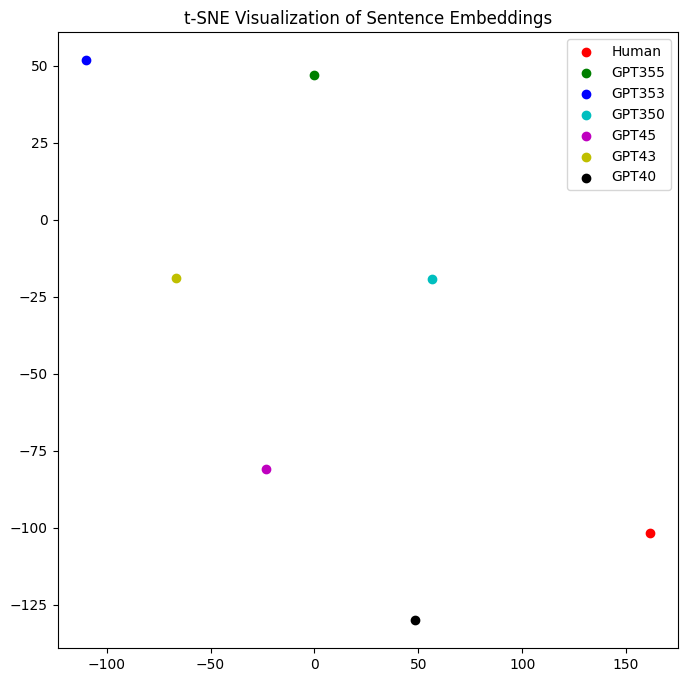

In [ ]:

avg_embedding_list1 = torch.mean(sentence_embeddings[:len(humanexp)], dim=0)
avg_embedding_list2 = torch.mean(sentence_embeddings[len(humanexp):len(humanexp)+len(gpt355)], dim=0)
avg_embedding_list3 = torch.mean(sentence_embeddings[len(humanexp) + len(gpt355):len(humanexp)+len(gpt355)+len(gpt353)], dim=0)
avg_embedding_list4 = torch.mean(sentence_embeddings[len(humanexp)+len(gpt355)+len(gpt353):len(humanexp)+len(gpt355)+len(gpt353)+len(gpt350)], dim=0)
avg_embedding_list5 = torch.mean(sentence_embeddings[len(humanexp)+len(gpt355)+len(gpt353)+len(gpt350):len(humanexp)+len(gpt355)+len(gpt353)+len(gpt350)+len(gpt45)], dim=0)
avg_embedding_list6 = torch.mean(sentence_embeddings[len(humanexp)+len(gpt355)+len(gpt353)+len(gpt350)+len(gpt45):len(humanexp)+len(gpt355)+len(gpt353)+len(gpt350)+len(gpt45)+len(gpt43)], dim=0)
avg_embedding_list7 = torch.mean(sentence_embeddings[len(humanexp)+len(gpt355)+len(gpt353)+len(gpt350)+len(gpt45)+len(gpt43):], dim=0)

# Generate embeddings for all sentences
avg_embeddings = np.vstack([avg_embedding_list1.detach().numpy(), avg_embedding_list2.detach().numpy(), avg_embedding_list3.detach().numpy(),avg_embedding_list4.detach().numpy(),avg_embedding_list5.detach().numpy(),avg_embedding_list6.detach().numpy(),avg_embedding_list7.detach().numpy()])
#labels = ['Human', 'GPT355', 'GPT353', 'GPT350', 'GPT45', 'GPT43', 'GPT40']
labels = [0,1,2,3,4,5,6]

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity = 5, random_state=42)
embeddings_2d = tsne.fit_transform(avg_embeddings)
print(embeddings_2d)

# Define colors for each label
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Visualize the embeddings in a plot with different colors for each list
plt.figure(figsize=(8, 8))
r = len(all_sentences) - 2
for i in range(0,7):
    print(i)
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], c=colors[labels[i]])

# Annotate each point with its corresponding sentence
# for i, txt in enumerate(all_sentences):
#     plt.annotate(txt, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)

# Create a legend for the plot
plt.legend(['Human', 'GPT355', 'GPT353', 'GPT350', 'GPT45', 'GPT43', 'GPT40'])

plt.title('t-SNE Visualization of Sentence Embeddings')
plt.show()


In [ ]:
dataset_path = '/content/drive/MyDrive/NLPProject/chinese_explanations_wgpt_filled.csv'

def read_csv(file_path):
    setups = []
    punchlines = []

    # read csv file
    with open(file_path, 'r', newline='', encoding='utf-8') as csvfile:
        csv_reader = csv.reader(csvfile)
        joke_punchlines = []
        joke_setups = []
        humanexp = []
        gpt355 = []
        gpt353 = []
        gpt350 = []
        gpt45 = []
        gpt43 = []
        gpt40 = []

        for row in csv_reader:
            joke_punchlines.append(row[0])
            joke_setups.append(row[1])
            humanexp.append(row[2])
            gpt355.append(row[3])
            gpt353.append(row[4])
            gpt350.append(row[5])
            gpt45.append(row[6])
            gpt43.append(row[7])
            gpt40.append(row[8])

            # if len(row) >= 2:
            #     punchline = re.sub(r'\s+', ' ', row[0].replace('\n', ' ').replace('\t', ''))
            #     punchlines.append(remove_punctuation(punchline))
            #     setup = re.sub(r'\s+', ' ', row[1].replace('\n', ' ').replace('\t', ''))
            #     setups.append(remove_punctuation(setup))

    return joke_punchlines, joke_setups, humanexp, gpt355, gpt353, gpt350, gpt45, gpt43, gpt40

joke_punchlines, joke_setups, humanexp, gpt355, gpt353, gpt350, gpt45, gpt43, gpt40 = read_csv(dataset_path)

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import torch

# Your three lists of sentence strings

# Combine all lists into a single list
c_all_sentences = humanexp + gpt355 + gpt353 + gpt350 + gpt45 + gpt43 + gpt40

# Assign labels for each sentence
#labels = [0]*len(humanexp) + [1]*len(gpt355) + [2]*len(gpt353) + [3]*len(gpt350) + [4]*len(gpt45) + [5]*len(gpt43)  + [6]*len(gpt40)

# Load the SentenceTransformer model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
c_sentence_embeddings = model.encode(c_all_sentences, convert_to_tensor=True)
print(c_sentence_embeddings)

tensor([[ 0.0099,  0.0682,  0.0143,  ...,  0.0985,  0.1135, -0.0067],
        [ 0.0438,  0.1386, -0.0294,  ...,  0.0173, -0.0033,  0.0367],
        [ 0.0256,  0.0417,  0.0620,  ...,  0.1291, -0.0180,  0.1113],
        ...,
        [-0.0858, -0.0562, -0.0033,  ...,  0.0404,  0.0811,  0.0060],
        [-0.0342,  0.1185, -0.0706,  ...,  0.0330,  0.0907, -0.0413],
        [-0.0462,  0.0246, -0.0268,  ...,  0.0454, -0.0713, -0.0475]])


In [ ]:

c_avg_embedding_list1 = torch.mean(c_sentence_embeddings[:len(humanexp)], dim=0)
c_avg_embedding_list2 = torch.mean(c_sentence_embeddings[len(humanexp):len(humanexp)+len(gpt355)], dim=0)
c_avg_embedding_list3 = torch.mean(c_sentence_embeddings[len(humanexp) + len(gpt355):len(humanexp)+len(gpt355)+len(gpt353)], dim=0)
c_avg_embedding_list4 = torch.mean(c_sentence_embeddings[len(humanexp)+len(gpt355)+len(gpt353):len(humanexp)+len(gpt355)+len(gpt353)+len(gpt350)], dim=0)
c_avg_embedding_list5 = torch.mean(c_sentence_embeddings[len(humanexp)+len(gpt355)+len(gpt353)+len(gpt350):len(humanexp)+len(gpt355)+len(gpt353)+len(gpt350)+len(gpt45)], dim=0)
c_avg_embedding_list6 = torch.mean(c_sentence_embeddings[len(humanexp)+len(gpt355)+len(gpt353)+len(gpt350)+len(gpt45):len(humanexp)+len(gpt355)+len(gpt353)+len(gpt350)+len(gpt45)+len(gpt43)], dim=0)
c_avg_embedding_list7 = torch.mean(c_sentence_embeddings[len(humanexp)+len(gpt355)+len(gpt353)+len(gpt350)+len(gpt45)+len(gpt43):len(humanexp)+len(gpt355)+len(gpt353)+len(gpt350)+len(gpt45)+len(gpt43)+len(gpt40)], dim=0)

# Generate embeddings for all sentences
c_avg_embeddings = np.vstack([c_avg_embedding_list1.detach().numpy(), c_avg_embedding_list2.detach().numpy(), c_avg_embedding_list3.detach().numpy(),c_avg_embedding_list4.detach().numpy(),c_avg_embedding_list5.detach().numpy(),c_avg_embedding_list6.detach().numpy(),c_avg_embedding_list7.detach().numpy()])
#labels = ['Human', 'GPT355', 'GPT353', 'GPT350', 'GPT45', 'GPT43', 'GPT40']
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity = 5, random_state=42)
c_embeddings_2d = tsne.fit_transform(c_avg_embeddings)
print(c_embeddings_2d)


[[-40.298832  47.348072]
 [ 14.727399  11.563982]
 [ 11.78103  -29.388273]
 [ 27.098326 -71.63524 ]
 [-26.355593  -8.835528]
 [ 49.778034 -14.366933]
 [-19.772207 -59.24266 ]]


-19.772207
0
1
2
3
4
5
6
7
8
9
10
11
12
13


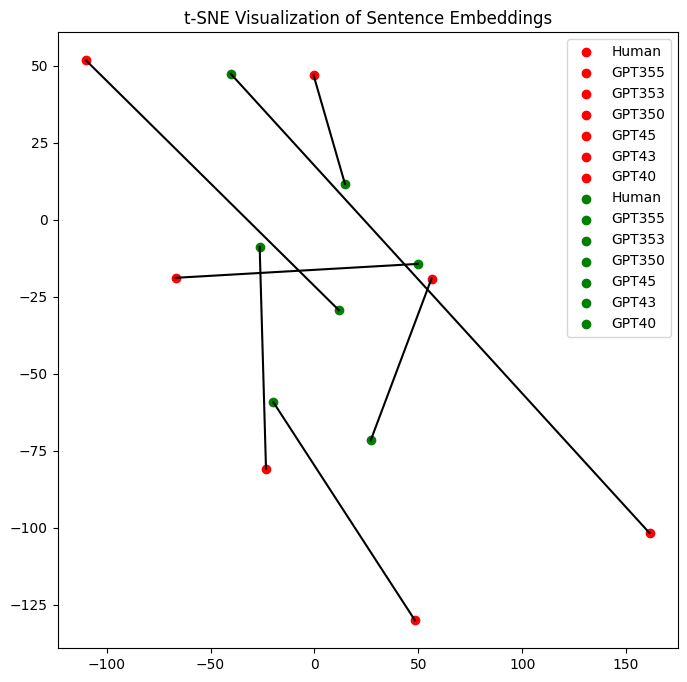

In [ ]:
# Define colors for each label
colors = ['r', 'r', 'r', 'r', 'r', 'r', 'r','g', 'g', 'g', 'g', 'g', 'g', 'g']
 #['r', 'g', 'b', 'c', 'm', 'y', 'k','r', 'g', 'b', 'c', 'm', 'y', 'k']

new_embeddings_2d = np.vstack((embeddings_2d, c_embeddings_2d))
print(new_embeddings_2d[13,0])
# Visualize the embeddings in a plot with different colors for each list
plt.figure(figsize=(8, 8))
for i in range(0,14):
    print(i)
    plt.scatter(new_embeddings_2d[i, 0], new_embeddings_2d[i, 1], c=colors[labels[i]])

# Annotate each point with its corresponding sentence
# for i, txt in enumerate(all_sentences):
#     plt.annotate(txt, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)

for i in range(7):
    plt.plot([new_embeddings_2d[i, 0], new_embeddings_2d[i + 7, 0]],
             [new_embeddings_2d[i, 1], new_embeddings_2d[i + 7, 1]], c='k')
# Create a legend for the plot
plt.legend(['Human', 'GPT355', 'GPT353', 'GPT350', 'GPT45', 'GPT43', 'GPT40','Human', 'GPT355', 'GPT353', 'GPT350', 'GPT45', 'GPT43', 'GPT40'])

plt.title('t-SNE Visualization of Sentence Embeddings')
plt.show()